# This is a SUPER rough draft as I put code vomit on a page; check back in a week it'll be nice and pretty (if not, @ me)

In [1]:
# https://github.com/dashee87/cryptory

In [2]:
import pandas as pd
import time
import datetime
import numpy as np
from fbprophet import Prophet

In [40]:
# load package
from cryptory import Cryptory

# initialise object 
# pull data from start of 2017 to present day
my_cryptory = Cryptory(from_date = "2018-01-01")

# get historical ethereum OHLC data from coinmarketcap
eth_ohlc_hist_df = my_cryptory.extract_coinmarketcap("ethereum")

# inspect the results
eth_ohlc_hist_df.head()

,date,open,high,low,close,volume,marketcap
0,2019-03-21,140.48,141.00,135.86,136.64,5087247796,14392427839
1,2019-03-20,140.48,140.95,138.31,140.69,4664134462,14817151375
2,2019-03-19,139.25,140.99,139.14,140.52,4251488129,14797612389
3,2019-03-18,140.10,142.27,138.84,139.37,4551739879,14675181094
4,2019-03-17,142.24,142.37,139.32,140.00,3827157729,14739201597


In [41]:
# subset to just the date and the closing price
eth_price_hist_df = my_cryptory.extract_coinmarketcap("ethereum").loc[:,['date','close']]
# rename dt column to ds and continous value column to y per fbprophet's docs
eth_price_hist_df.columns = ['ds', 'y']

In [42]:
m = Prophet()
m.fit(eth_price_hist_df)

/Users/pauljeffries/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/pauljeffries/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [43]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
470,2019-04-16
471,2019-04-17
472,2019-04-18
473,2019-04-19
474,2019-04-20


In [44]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
470,2019-04-16,109.345479,9.273463,205.657679
471,2019-04-17,106.143566,0.843951,206.281169
472,2019-04-18,107.265248,3.286040,205.579076
473,2019-04-19,110.502549,6.898710,211.294238
474,2019-04-20,119.334246,9.713430,218.347691


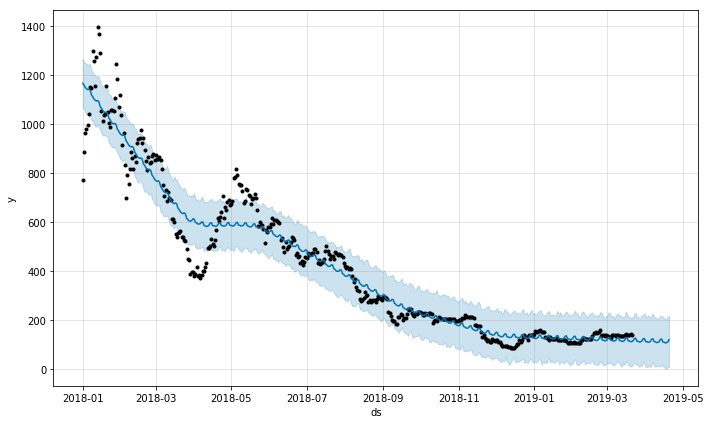

In [46]:
# Python
fig1 = m.plot(forecast)

In [47]:
%run -i 'prophet_helper_functions.py'

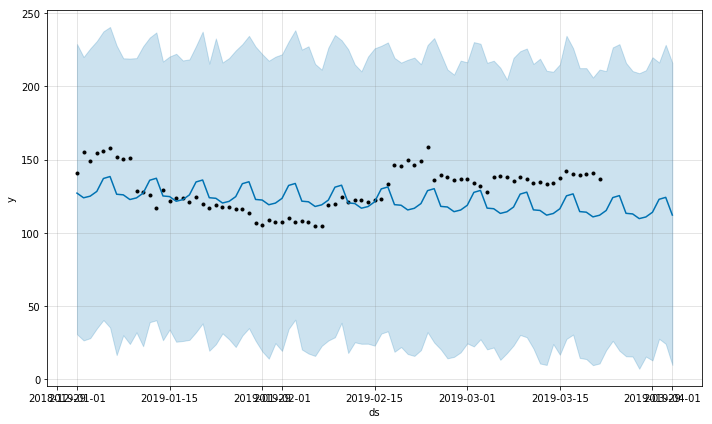

In [48]:
dt_restricted_prophet_plt(
    m = m,
    fcst = forecast,
    visible_window_start_dt = '01JAN2019',
    visible_window_end_dt = '01APR2019'
);

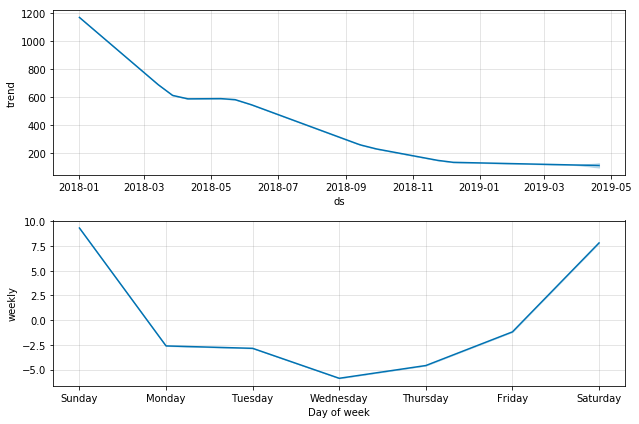

In [49]:
# Python
fig2 = m.plot_components(forecast)

In [53]:
%%capture
# capturing warnings here because one of the dependencies throws a bunch of numpy deprecation warnings

from fbprophet.diagnostics import cross_validation
df_dv = cross_validation(m, horizon = '30 days')

INFO:fbprophet:Making 22 forecasts with cutoffs between 2018-04-10 00:00:00 and 2019-02-19 00:00:00


In [54]:
df_dv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-04-11,332.567760,199.504807,457.289421,430.54,2018-04-10
1,2018-04-12,313.721769,175.126528,455.167224,492.94,2018-04-10
2,2018-04-13,320.635262,192.303728,451.192593,492.73,2018-04-10
3,2018-04-14,337.973203,205.306766,464.866901,501.48,2018-04-10
4,2018-04-15,329.689517,191.321587,459.603064,531.70,2018-04-10


In [55]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_dv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
32,3 days,9485.018258,97.391058,77.888030,0.273718,0.848485
273,4 days,9354.541256,96.718877,76.879629,0.271937,0.848485
423,4 days,8449.837085,91.922995,74.065867,0.270981,0.863636
33,4 days,9300.274741,96.437932,76.775209,0.269912,0.848485
483,4 days,9285.394477,96.360752,76.382924,0.266766,0.848485


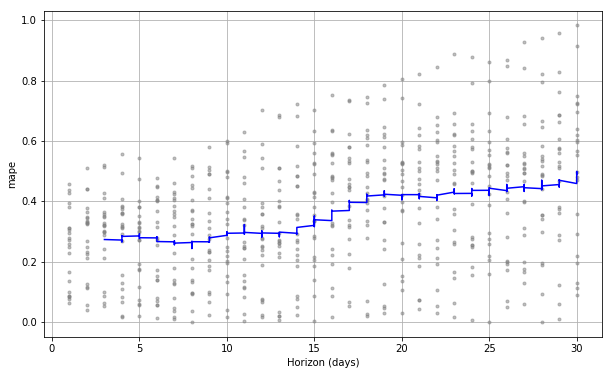

In [56]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_dv, metric = 'mape')